In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import os
all_dfs = []
fold1 = 0
fold2 = 0
fold3 = 0
fold4 = 0
fold5 = 0
directory = os.fsencode("feature data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("0.csv"):
        try:
            df = pd.read_csv("feature data/" + filename, header=None)
            all_dfs.append(df)
            if int(filename[0:2]) <= 12:
                fold1 += df.shape[0]
            elif int(filename[0:2]) <= 24:
                fold2 += df.shape[0]
            elif int(filename[0:2]) <= 36:
                fold3 += df.shape[0]
            elif int(filename[0:2]) <= 48:
                fold4 += df.shape[0]
            elif int(filename[0:2]) <= 60:
                fold5 += df.shape[0]
        except:
            pass
fold1, fold2, fold3, fold4, fold5 = fold1, fold1 + fold2, fold1 + fold2 + fold3, fold1 + fold2 + fold3 + fold4, fold1 + fold2 + fold3 + fold4 + fold5
fold1, fold2, fold3, fold4, fold5

(476, 971, 1449, 1919, 2365)

In [3]:
data = pd.concat(all_dfs)
data

,0,1,2,3,4,5,6
0,0.0,0.193878,0.060185,0.181122,0.062500,0.344388,0.131944
1,0.0,0.185279,0.059908,0.159898,0.064516,0.327411,0.135945
2,0.0,0.183168,0.051454,0.148515,0.058166,0.316832,0.131991
3,0.0,0.178756,0.048611,0.168394,0.053241,0.341969,0.120370
4,0.0,0.180662,0.047506,0.152672,0.047506,0.318066,0.125891
...,...,...,...,...,...,...,...
16,10.0,0.173633,0.048295,0.173633,0.045455,0.392283,0.090909
17,10.0,0.169279,0.043732,0.178683,0.055394,0.288401,0.230321
18,10.0,0.174342,0.051672,0.177632,0.054711,0.365132,0.139818
19,10.0,0.166102,0.033639,0.176271,0.036697,0.362712,0.159021


In [4]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X = pd.DataFrame(scaler.fit_transform(X))
Y = pd.DataFrame(np.array(Y))
X.columns = ["Left Eye Width", "Left Eye Height", "Right Eye Width", "Right Eye Height", "Mouth Width", "Mouth Height"]
X

,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.742409,0.493463,0.661817,0.462014,0.482701,0.412251
1,0.668379,0.490166,0.503346,0.483860,0.410035,0.429143
2,0.650205,0.389691,0.418349,0.415047,0.364750,0.412448
3,0.612220,0.355901,0.566777,0.361683,0.472348,0.363379
4,0.628623,0.342765,0.449387,0.299543,0.370034,0.386689
...,...,...,...,...,...,...
2360,0.568112,0.352149,0.605900,0.277314,0.687712,0.238977
2361,0.530622,0.297908,0.643606,0.385011,0.243057,0.827651
2362,0.574214,0.392277,0.635752,0.377617,0.571493,0.445496
2363,0.503266,0.177953,0.625595,0.182423,0.561136,0.526585


In [7]:
pd.concat([Y, X], axis=1).to_csv("feature data/scaled.csv", index=False)

In [85]:
data = pd.read_csv("feature data/scaled.csv")
data.loc[data["0"] == 10, "0"] = "Drowsy"
data.loc[data["0"] == 0, "0"] = "Non Drowsy"
data

,0,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,Non Drowsy,0.742409,0.493463,0.661817,0.462014,0.482701,0.412251
1,Non Drowsy,0.668379,0.490166,0.503346,0.483860,0.410035,0.429143
2,Non Drowsy,0.650205,0.389691,0.418349,0.415047,0.364750,0.412448
3,Non Drowsy,0.612220,0.355901,0.566777,0.361683,0.472348,0.363379
4,Non Drowsy,0.628623,0.342765,0.449387,0.299543,0.370034,0.386689
...,...,...,...,...,...,...,...
2360,Drowsy,0.568112,0.352149,0.605900,0.277314,0.687712,0.238977
2361,Drowsy,0.530622,0.297908,0.643606,0.385011,0.243057,0.827651
2362,Drowsy,0.574214,0.392277,0.635752,0.377617,0.571493,0.445496
2363,Drowsy,0.503266,0.177953,0.625595,0.182423,0.561136,0.526585


In [90]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]

In [91]:
def split_data(fold): # fold to test on
    if fold == 1:
        xtr, xte = X[fold1:], X[:fold1]
        ytr, yte = Y[fold1:], Y[:fold1]
    if fold == 2:
        xtr, xte = pd.concat([X[:fold1], X[fold2:]]), X[fold1:fold2]
        ytr, yte = pd.concat([Y[:fold1], Y[fold2:]]), Y[fold1:fold2]
    if fold == 3:
        xtr, xte = pd.concat([X[:fold2], X[fold3:]]), X[fold2:fold3]
        ytr, yte = pd.concat([Y[:fold2], Y[fold3:]]), Y[fold2:fold3]
    if fold == 4:
        xtr, xte = pd.concat([X[:fold3], X[fold4:]]), X[fold3:fold4]
        ytr, yte = pd.concat([Y[:fold3], Y[fold4:]]), Y[fold3:fold4]
    if fold == 5:
        xtr, xte = X[:fold4], X[fold4:]
        ytr, yte = Y[:fold4], Y[fold4:]
    return xtr, xte, ytr, yte

In [92]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, shuffle=False)

In [93]:
X_Train, X_Test, Y_Train, Y_Test = split_data(2)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [96]:
classifier = RandomForestClassifier(n_estimators = 100, 
                                    max_depth = 6,
                                    criterion = 'entropy', 
                                    bootstrap=True,
                                    random_state=42,
                                   )
classifier.fit(X_Train,Y_Train)
Y_Pred = classifier.predict(X_Train)
accuracy = accuracy_score(Y_Train, Y_Pred)
precision = precision_score(Y_Train, Y_Pred, pos_label="Drowsy")
recall = recall_score(Y_Train, Y_Pred, pos_label="Drowsy")
f1 = f1_score(Y_Train, Y_Pred, pos_label="Drowsy")
accuracy, precision, recall, f1

(0.7304812834224599,
 0.8177777777777778,
 0.5916398713826366,
 0.6865671641791045)

In [98]:
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
precision = precision_score(Y_Test, Y_Pred, pos_label="Drowsy")
recall = recall_score(Y_Test, Y_Pred, pos_label="Drowsy")
f1 = f1_score(Y_Test, Y_Pred, pos_label="Drowsy")
accuracy, precision, recall, f1

(0.7272727272727273, 0.7969543147208121, 0.623015873015873, 0.6993318485523385)

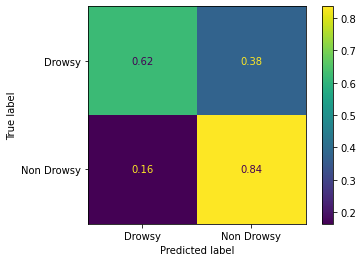

In [99]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_Test, Y_Test, normalize="true")
plt.savefig("confusion_matrix_rf.png")

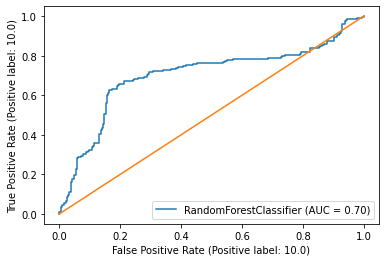

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_Test, Y_Test)
x = np.linspace(0, 1, 1000)
plt.plot(x,x)

In [ ]:
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
graph = Source( export_graphviz(classifier[0], out_file=None, feature_names=X.columns, class_names = ["Non-Drowsy", "Drowsy"],
                               filled=True, rounded=True))
graph.format = 'png'
graph.render('tree1', view=True)

In [20]:
list(zip(X_Train, classifier.feature_importances_))

[('Left Eye Width', 0.14051746143855942),
 ('Left Eye Height', 0.1869799410219126),
 ('Right Eye Width', 0.18674846584676041),
 ('Right Eye Height', 0.15667156423278364),
 ('Mouth Width', 0.18796255966521694),
 ('Mouth Height', 0.1411200077947669)]